In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
cdf = pd.read_csv(city_data_to_load)
rdf = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(rdf, cdf, on  = "city")
data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

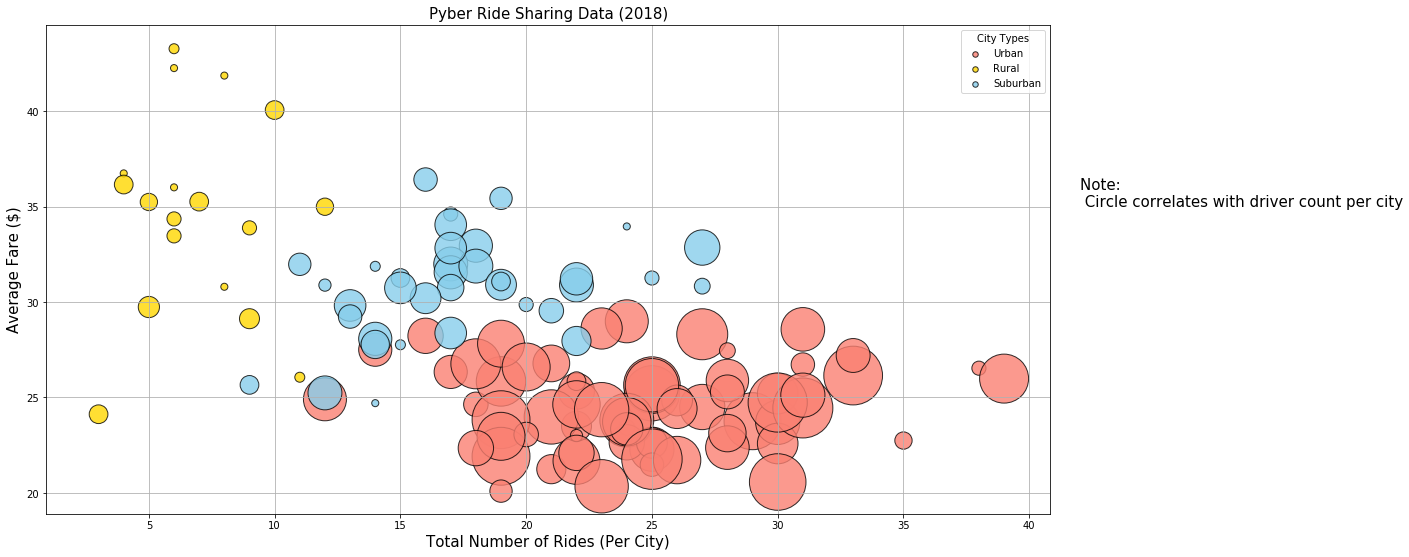

In [8]:
#obtains data based on type
urban = data[data["type"] == "Urban"].groupby("city")
rural = data[data["type"] == "Rural"].groupby("city")
suburban = data[data["type"] == "Suburban"].groupby("city")
#obtains data based on type and rides
ur = urban.count()
rr = rural.count()
sr = suburban.count()
#obtains data based on type and mean fare
uf = urban["fare"].mean()
rf = rural["fare"].mean()
sf = suburban["fare"].mean()

# Build the scatter plots for each city types with color and scaling
fig, splot = plt.subplots(figsize=(18,9))
u_scatter = plt.scatter(ur["ride_id"], uf, s = urban["driver_count"].mean()*50, label = "Urban", color = "salmon", edgecolor = "black", alpha = 0.8)
r_scatter = plt.scatter(rr["ride_id"], rf, s = rural["driver_count"].mean()*50, label = "Rural", color = "gold", edgecolor = "black", alpha = 0.8)
s_scatter = plt.scatter(sr["ride_id"], sf, s = suburban["driver_count"].mean()*50, label = "Suburban", color = "skyblue", edgecolor = "black", alpha = 0.8)

#creates labels
plt.xlabel("Total Number of Rides (Per City)", fontsize = 15)
plt.ylabel("Average Fare ($)", fontsize = 15)
plt.title("Pyber Ride Sharing Data (2018)", fontsize = 15)

#creates a legend with sizing and title
lgd = plt.legend( title = "City Types", loc = "upper right")
lgd.legendHandles[0]._sizes = [30]
lgd.legendHandles[1]._sizes = [30]
lgd.legendHandles[2]._sizes = [30]

#turns on grid
plt.grid()

# Incorporate a text label regarding circle size
splot.text(42,35,s = "Note: \n Circle correlates with driver count per city", fontsize = 15)
plt.show()


## Total Fares by City Type

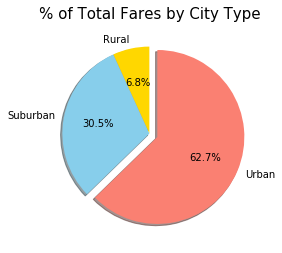

In [81]:
# Calculate Type Percents
group_type = data.groupby("type")
sums = group_type["fare"].sum()
# Build Pie Chart
plt.pie(sums, explode=(0,0,0.1), labels=["Rural","Suburban","Urban"], colors=["gold","skyblue","salmon"],autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type", fontsize = 15)
plt.show()


## Total Rides by City Type

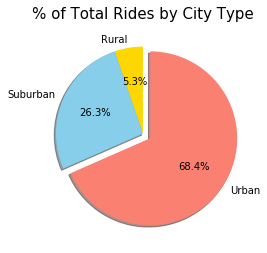

In [37]:
# Calculate Ride Percents
counts = group_type["ride_id"].count()
# Build Pie Chart
plt.pie(counts, explode=(0,0,0.1), labels=["Rural","Suburban","Urban"], colors=["gold","skyblue","salmon"],autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type", fontsize = 15)
plt.show()


## Total Drivers by City Type

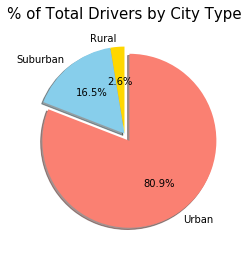

In [80]:
# Calculate Driver Percents
driverdf = data.groupby("city").first()
driver_sum= driverdf.groupby('type').sum()
dcount_sums = driver_sum['driver_count']
# Build Pie Charts
plt.pie(dcount_sums, explode=(0,0,0.1), labels=["Rural","Suburban","Urban"], colors=["gold","skyblue","salmon"],autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type", fontsize = 15)
plt.show()
